
___
<div class="alert alert-block alert-info"><p style = "font-family: Arial; font-size: 350%; text-align: center; color: darkblue"> <b>Bab 8: Q-learning</b></div>


____
    
>Referensi: 
>+ Hadelin de Ponteves (2019), **AI Crash Course_ A Fun and Hands-On Introduction to Reinforcement Learning, Deep Learning, and Artificial Intelligence with Python** 

___


>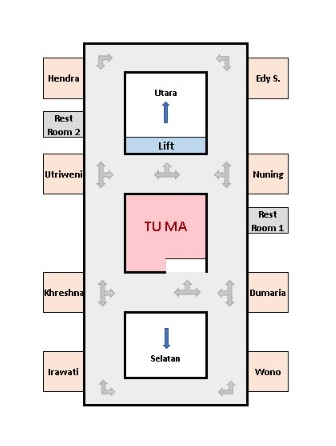

>Our mission is to build an AI that will always take the shortest route to the top priority location, whatever the location it starts from, and have the option to go by an intermediary location which is in the top three priorities.

Building the environment
---

>When building an AI, the first thing we always have to do is define the environment.
Defining an environment always requires the following three elements:
>* Defining the states
>* Defining the actions
>* Defining the rewards
>
>These three elements have already been defined in the previous chapter on Q-learning, but let's quickly remind ourselves what they are.

AI solution refresher
---

>Let's remind ourselves of the steps of the Q-learning process; this time, adapting it to your new problem. Let's welcome Q-learning back on stage:

Initialization (first iteration)
---

>For all pairs of states **s** and actions **a**, `the Q-values are initialized to 0`:
>
>For all `states` **s** = 0, 1, … , 10, 11 and `actions` **a** = 0, 1, …, 10, 11:  
>+ **Q(s, a) = 0**

Next iterations
---

>At each iteration **t ≥ 1**, the AI will repeat the following steps:
>1. It selects a random state $s_{t}$ from the possible states:
>random(0,1,2,3,4,5,6,7,8,9,10,11).
>
>2. It performs a random action $a_{t}$ that can lead to a next possible state, that is, such that $R(s_{t},a_{t}) > 0$
>> random(0,1,2,3,4,5,6,7,8,9,10,11) s.t. $R(s_{t},a_{t}) > 0$
>
>3. It reaches the next state $s_{t+1}$ and gets the reward $R(s_{t},a_{t}) > 0$.
>
>4. It computes the temporal difference $TD_{t}(s_{t}, a_{t})$:
>> $TD_{t}(s_{t}, a_{t})$ = $[R(s_{t},a_{t})$ + $\gamma \underset{a}{\max }%
Q(s_{t+1},a)]-Q(s_{t},a_{t})$
>
>5. It updates the Q-value by applying `the Bellman equation`:
>> $Q_{t}(s_{t},a_{t})=Q_{t-1}(s_{t},a_{t})+\alpha \ TD_{t}(s_{t},a_{t})$
>
>We repeat these steps over 1,000 iterations.

Frans Jason Rudianto - 13217089

In [1]:
# AI for Logistics - Robots in a warehouse

# Importing the libraries
import numpy as np
from numpy import *
from numpy.random import *
import pandas as pd
np.set_printoptions(precision = 1, linewidth = 90, formatter = {'float':'{:5.1f}'.format})
pd.set_option("display.max_rows", 15, "precision", 2)

seed(20210321)

"PART 1 - BUILDING THE ENVIRONMENT"

# Defining the location (states) 
location = array(['I', 'W', 'K', 'TU', 'D', 'R1', 'U', 'L', 'N', 'R2', 'H', 'E'])

akronim  = {'I':'Bu Irawati', 'W':'Pak Wono', 'K':'Pak Khreshna', 'TU': 'Tata Usaha MA', 
            'D':'Bu Dumaria', 'R1':'Rest Room 1', 'U':'Bu Utriweni', 'L':'Lift', 'N':'Bu Nuning', 
            'R2': 'Rest Room 2', 'H':'Pak Hendra', 'E':'Pak Edy Soewono'}
# Defining the action
actiondef =  array(['U', 'S', 'B', 'T'])
actionakronim ={'U':'Utara', 'S':'Selatan', 'B':'Barat', 'T':'Timur'}
# Defining the rewards
             
R0 = array([[1,0,0,1],
            [1,0,1,0],
            [1,1,1,0],
            [0,0,1,1],
            [1,1,1,0],
            [0.8,1,0,0],
            [1,1,0,1],
            [0,0,1,1],
            [1,1.2,1,0],
            [1,1,0,0],
            [0,1,0,1],
            [0,1,1,0]])
# Defining next locaiton


location_action =array([[2,-1,-1,1],
                        [4,-1,0,-1],
                        [6,3,1,-1],
                        [-1,-1,2,4],
                        [5,1,3,-1],
                        [8,4,-1,-1],
                        [9,2,-1,7],
                        [-1,-1,6,8],
                        [11,5,7,-1],
                        [10,6,-1,-1],
                        [-1,9,-1,11],
                        [-1,8,10,-1]])
                

pdR0 = pd.DataFrame(R0, location, actiondef)
#display(pdR0)

d = len(R0)
l = len(actiondef)

"PART 2 - BUILDING THE AI SOLUTION WITH Q-LEARNING"

'''
Perbendaharaan istilah

Untuk location:
start  => starting location (robot mulai melangkah)
finish => ending location (robot sampai tujuan)
nextloc => next location (tidak ada current location)

Untuk state:
initial => initial state 
terminal => terminal state
state (S(t)) => state: current state
next_state (S(t+1)) => action: 
action (a(t)) => action: next state
'''

# Setting the parameters γ and α for the Q-Learning
γ = 0.9
α = 0.2

# Making a function that returns the shortest route from a starting to ending location
def jalur(start, finish):  #rute mulai dari 'starting location' dan berakhir di 'ending location'
    
    "Training mode"
    "Tentang perubahan states and actions => updating parameters Q"
    
    R = copy(R0)
    terminal = where(location == finish)    #locstate[finish]
    #R[terminal, terminal] = 2.5
    Q = zeros([d,l])
    
    epochs = 2000
    for i in range(epochs):
        state  = randint(0, d)  #pilih 'current state' secara acak 
        action = choice(where(R[state,:] > 0)[0])  #action: pilih secara acak state yang bisa disinggahi (exploration)
        next_state = location_action[state, action]
        TD = (R[state, action] + γ*Q[next_state, argmax(Q[next_state,:])]) - Q[state, action]
        Q[state, action] += α*TD
        #pengurangan untuk mengurangi kecenderungan untuk balik ke jalur yang barusan dilalui
        #Q[next_state, where(location_action[next_state] == state)] = α*TD*0.7
        
    pdQ = pd.DataFrame(Q, location, actiondef)
    #display(pdQ)
    #print('Nilai Q akan digunakan untuk menentukan lintasan yang ditempuh oleh robot dari suatu lokasi tertentu.')
    
    "Inference mode => no updating Q"
    "Selesai penentuan Q, gunakan Q untuk menjalankan robot"
    lintasan = []
    lintasan.append([akronim[start], " "])
    nextloc  = start
    
    j = 0
    while (nextloc != finish):  #akan dipilih location berikutnya
        initial = where(location == start) 
        action  = argmax(Q[initial,:])  #pilih location berdasarkan nilai Q terbesar
        
        #print("action", squeeze(location_action[where(location == nextloc), action]), nextloc, action)
        nextloc = location[squeeze(location_action[where(location == nextloc), action])]
        start   = nextloc
        lintasan.append([akronim[nextloc], actionakronim[actiondef[action]]])
        j += 1
        if j > 12:  #belum pernah nyampe finish
            print('Belum nyampe finish, perbesar epochs')
            break
                    
    #print(lintasan)
    return lintasan, pdQ

"PART 3 - GOING INTO PRODUCTION (inference)"

start  = 'N'
finish = 'H'
jalur1 = jalur(start, finish)
dfQ = jalur1[1]
print(f"Untuk lintasan dari {akronim[start]} ke {akronim[finish]}, learning sudah selesai")
print("dengan hasil akhir updating parameters Q berupa:\n")
#display(dfQ)
display(dfQ.style.set_table_styles([{'selector':'th','props':[('background','Blue'),('color','yellow'), ]},]))

# Printing the final route
print(f"\nLintasan robot dari {akronim[start]} langsung ke {akronim[finish]}:\n")
for i in jalur1[0]:
    print(f'{i[0]} => ', end ='')
print(' Sudah nyampe \U0001F642')
print(f"\nArah GerakRobot robot dari {akronim[start]} langsung ke {akronim[finish]}:\n")
print(f'{jalur1[0][0][0]}', end ='')
for i in jalur1[0]:
    print(f'{i[1]} => ', end ='')
print(' Sudah nyampe \U0001F642')

def jalur_alternatif(start, intermediary, finish):
    return jalur(start, intermediary)[0] + jalur(intermediary, finish)[0][1:]

mampir = 'W'
display(jalur(start, mampir)[1].style.set_table_styles([{'selector':'th','props':[('background','Green'),('color','yellow'), ]},]))
display(jalur(mampir, finish)[1].style.set_table_styles([{'selector':'th','props':[('background','Orange'),('color','yellow'), ]},]))
print(f"\n\nLintasan robot dari {akronim[start]} ke {akronim[finish]} bila mampir dulu di {akronim[mampir]}:\n")
jalur2 = jalur_alternatif(start, mampir, finish)
for i in jalur2:
    print(f'{i[0]} => ', end ='')
print(' Sudah nyampe \U0001F642')
print(f"\n\nArah gerak robot dari {akronim[start]} ke {akronim[finish]} bila mampir dulu di {akronim[mampir]}:\n")
print(f'{jalur2[0][0]}', end ='')
for i in jalur2:
    print(f'{i[1]} => ', end ='')
print(' Sudah nyampe \U0001F642')
#print(jalur_alternatif(start, mampir, finish))
#print('\n\nTentu saja untuk "jalur_alternatif" harus digunakan dua buah Q yang bersambung')

Untuk lintasan dari Bu Nuning ke Pak Hendra, learning sudah selesai
dengan hasil akhir updating parameters Q berupa:



,U,S,B,T
I,8.6,0,0,8.3
W,8.3,0,8.5,0
K,8.5,8.1,8.4,0
TU,0,0,8.4,8.4
D,8.3,8.5,8.3,0
R1,8.2,8.4,0,0
U,8.6,8.2,0,8.2
L,0,0,8.5,8.6
N,8.5,8.5,8.3,0
R2,8.7,8.5,0,0



Lintasan robot dari Bu Nuning langsung ke Pak Hendra:

Bu Nuning => Pak Edy Soewono => Pak Hendra =>  Sudah nyampe 🙂

Arah GerakRobot robot dari Bu Nuning langsung ke Pak Hendra:

Bu Nuning  => Utara => Barat =>  Sudah nyampe 🙂
Belum nyampe finish, perbesar epochs


,U,S,B,T
I,8.3,0,0,8.5
W,8.6,0,8.5,0
K,8.3,8.3,8.3,0
TU,0,0,8.3,8.5
D,8.6,8.5,8.6,0
R1,8.5,8.6,0,0
U,8.6,8.3,0,8.6
L,0,0,8.6,8.5
N,8.5,8.6,8.6,0
R2,8.6,8.6,0,0


,U,S,B,T
I,8.4,0,0,8.6
W,8.6,0,8.5,0
K,8.5,8.4,8.4,0
TU,0,0,8.5,8.5
D,8.2,8.5,8.6,0
R1,8.4,8.5,0,0
U,8.5,8.3,0,8.5
L,0,0,8.6,8.6
N,8.5,8.5,8.5,0
R2,8.6,8.5,0,0




Lintasan robot dari Bu Nuning ke Pak Hendra bila mampir dulu di Pak Wono:

Bu Nuning => Rest Room 1 => Bu Dumaria => Pak Wono => Bu Irawati => Pak Khreshna => Bu Utriweni => Rest Room 2 => Pak Hendra =>  Sudah nyampe 🙂


Arah gerak robot dari Bu Nuning ke Pak Hendra bila mampir dulu di Pak Wono:

Bu Nuning  => Selatan => Selatan => Selatan => Barat => Utara => Utara => Utara => Utara =>  Sudah nyampe 🙂


In [26]:
choice(where(R0[4,:] > 0)[0])

1